In [1]:
# classifier and attacker
# dataset: mnist
# author: Ying Meng

# ---------------------
# import required packages
# ---------------------
from __future__ import division, absolute_import, print_function
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from tensorflow.keras import layers, models
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from cleverhans.evaluation import batch_eval
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.
W0703 21:25:25.280174 139639220602624 deprecation_wrapper.py:119] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/cleverhans/utils_tf.py:341: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.



In [2]:
# parameters
IMG_ROW = 28
IMG_COL = 28
LR = 0.001
BATCH_SIZE = 128
VAL_RATE = 0.2

In [3]:
'''
Load data
@author: Ying Meng (y.meng201011(at)gmail(dot)com)
'''
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, IMG_ROW, IMG_COL, 1)
X_test = X_test.reshape(-1, IMG_ROW, IMG_COL, 1)
# cast pixels to floats, normalize to [0, 1] range
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot-encode the labels
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

nb_train = int(len(X_train) * VAL_RATE)
train_samples = X_train[:-nb_train]
train_classes = Y_train[:-nb_train]
val_samples = X_train[-nb_train:]
val_classes = Y_train[-nb_train:]

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


/home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/keras_preprocessing/image/image_data_generator.py:355: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


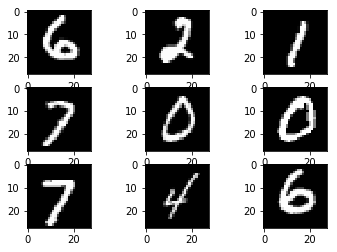

In [4]:
# define data preparation
datagen = ImageDataGenerator(samplewise_std_normalization = True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

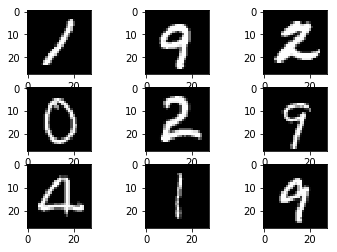

In [5]:
# define data preparation
datagen = ImageDataGenerator(samplewise_std_normalization = True)
# fit parameters from data
datagen.fit(X_test)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_test, Y_test, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break

In [6]:
'''
Define model structures for some datasets.
@author: Ying Meng (y.meng201011(at)gmail(dot)com)
'''
# Set random seed
np.random.seed(0)

# datasets
DATASETS = ['mnist', 'cifar']

def cnn(dataset='mnist'):
    """
    Takes in a parameter indicating which model type to use ('mnist', or
    'cifar') and returns the appropriate Keras model.
    :param dataset: A string indicating which dataset we are building
                    a model for.
    :return: The model; a Keras 'Sequential' instance.
    """
    assert dataset in DATASETS, "dataset parameter must be either 'mnist' or 'cifar'"

    if dataset == 'mnist':
        # MNIST model
        struct = [
            layers.Conv2D(32, (3, 3), input_shape = (IMG_ROW, IMG_COL, 1)),
            layers.Activation('relu'),
            layers.MaxPooling2D(pool_size = (2, 2)),

            layers.Conv2D(64, (3, 3)),
            layers.Activation('relu'),
            layers.MaxPooling2D(pool_size = (2, 2)),

            layers.Flatten(),
            layers.Dense(64 * 64),
            layers.Dropout(rate = 0.4),
            layers.Dense(10),
            layers.Activation('softmax')
        ]
    elif dataset == 'cifar':
        # CIFAR-10 model
        raise NotImplementedError('Not ready yet.')

    model = models.Sequential()
    for layer in struct:
        model.add(layer)

    return model

In [7]:
# Define the model
model = cnn('mnist')
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])
# Train the model
model.fit(train_samples, train_classes, epochs = 15,
          batch_size = BATCH_SIZE, shuffle = True,
          verbose = 1, validation_data = (val_samples, val_classes))

# Save the model
model.save("data/mnist_samplewise_std_normalization_cnn.h5")
print("Trained model has been saved to data/ \subfolder")

W0703 21:25:26.711107 139639220602624 deprecation.py:506] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 35s 727us/sample - loss: 0.1512 - acc: 0.9522 - val_loss: 0.0612 - val_acc: 0.9821
Epoch 2/15
48000/48000 [==============================] - 32s 675us/sample - loss: 0.0496 - acc: 0.9843 - val_loss: 0.0502 - val_acc: 0.9851
Epoch 3/15
48000/48000 [==============================] - 33s 678us/sample - loss: 0.0352 - acc: 0.9891 - val_loss: 0.0362 - val_acc: 0.9897
Epoch 4/15
48000/48000 [==============================] - 32s 664us/sample - loss: 0.0292 - acc: 0.9906 - val_loss: 0.0447 - val_acc: 0.9887
Epoch 5/15
48000/48000 [==============================] - 32s 669us/sample - loss: 0.0234 - acc: 0.9926 - val_loss: 0.0714 - val_acc: 0.9811
Epoch 6/15
48000/48000 [==============================] - 32s 675us/sample - loss: 0.0200 - acc: 0.9935 - val_loss: 0.0441 - val_acc: 0.9879
Epoch 7/15
48000/48000 [==============================] - 32s 674us/sample - loss: 0.0168 - acc: 0.9944 

In [8]:
# Load the trained model
model = load_model("data/mnist_samplewise_std_normalization_cnn.h5")

_, acc = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc: {}'.format(100 * acc))

W0703 21:33:38.530575 139639220602624 deprecation.py:506] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0703 21:33:38.532139 139639220602624 deprecation.py:506] From /home/rabina7/anaconda3/envs/opencv/lib/python2.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


test acc: 98.7600028515


In [9]:
def fgsm(x, prediction, epsilon, y = None):
    '''
    Define the symbolic FGSM fitting tf framework
    Ying Meng
    '''
    if y is None:
        y = tf.to_float(tf.equal(prediction, 
                                tf.reduce_max(prediction, 1, keepdims = True)))
        
    y /= tf.reduce_sum(y, 1, keepdims = True)
    
    logits, = prediction.op.inputs
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = y))

    
    grad, = tf.gradients(loss, x)
    perturbation = epsilon * tf.sign(grad)
    adv_sample = tf.stop_gradient(x + perturbation)
    
    return adv_sample

In [10]:
# Create TF session
sess = tf.Session()
K.set_session(sess)
K.set_learning_phase(0)

# define tf placeholders and operations
x = tf.placeholder(tf.float32, shape = (None,) + X_test.shape[1:])
y = tf.placeholder(tf.float32, shape = (None,) + Y_test.shape[1:])

# load model
model = load_model("data/mnist_samplewise_std_normalization_cnn.h5")

# model accuracy
_, acc_original = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print('test acc (on original): {}'.format(acc_original))

# symbolic fgsm
epsilon = 0.25
x_adv = fgsm(x, model(x), epsilon = epsilon, y = y)

# craft adversarial examples
X_adv, = batch_eval(sess, [x, y], [x_adv], [X_test, Y_test], batch_size = BATCH_SIZE)
# define data preparation
'''datagen = ImageDataGenerator(samplewise_std_normalization = True)
# fit parameters from data
datagen.fit(X_adv)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_adv, Y_test, batch_size=9):
    # create a grid of 3x3 image
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break'''
# test accuracy on adversarial examples
_, acc_adv = model.evaluate(X_adv, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc (on adversarial): {} - (epsilon: {})'.format(acc_adv, epsilon))

# save the generated adversarial examples
np.save("data/adv_mnist_fgsm_eps25.npy", X_adv)
print('adversarial examples were generated and saved to data/ \subfolder')
#sess.close()

test acc (on original): 0.987600028515
test acc (on adversarial): 0.364199995995 - (epsilon: 0.25)
adversarial examples were generated and saved to data/ \subfolder


In [11]:
# Error Rate
# 1. load the model
model = load_model("data/mnist_samplewise_std_normalization_cnn.h5")
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
Y_test=Y_test.reshape((10000,1))
X_test=X_test.reshape((10000,28,28,1))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_test = np_utils.to_categorical(Y_test, 10)
_, acc_original = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print('test acc (on original): {}'.format(acc_original))
# 2. load the adversarial examples
X_adv, = batch_eval(sess, [x, y], [x_adv], [X_test, Y_test], batch_size = BATCH_SIZE)
_, acc_adv = model.evaluate(X_adv, Y_test, batch_size = BATCH_SIZE, verbose = 0)
print ('test acc (on adversarial): {} - (epsilon: {})'.format(acc_adv, epsilon))
adv_pred = model.predict(X_adv)
ori_pred = model.predict(X_test)
total_count = 0
error_count = 0
adv_predict_labels = np.argmax(adv_pred,axis=1)
ori_predict_labels = np.argmax(ori_pred,axis=1)
true_labels = np.argmax(Y_test,axis=1)
num_tests = len(ori_pred)
for i in range(num_tests):
    # this means the original model could classify test sample i correctly
    if (ori_predict_labels[i] == true_labels[i]):
        total_count += 1
    # this means the original model classify the adversarial example
    # (test sample i + perturbation) into some label but not "i".
    # That is, the attack is successful and the model fails in this case.
        if (adv_predict_labels[i] != true_labels[i]):
            error_count += 1
            print("predicate class: {}, True label: {}, totaladv: {}, counter: {} ".format(adv_predict_labels[i], true_labels[i], total_count, error_count))
    error_rate = (1.0 * error_count/total_count)
    print("error rate is: " + str(error_rate))

test acc (on original): 0.987600028515
test acc (on adversarial): 0.364199995995 - (epsilon: 0.25)
error rate is: 0.0
predicate class: 6, True label: 2, totaladv: 2, counter: 1 
error rate is: 0.5
predicate class: 4, True label: 1, totaladv: 3, counter: 2 
error rate is: 0.666666666667
predicate class: 6, True label: 0, totaladv: 4, counter: 3 
error rate is: 0.75
error rate is: 0.6
predicate class: 4, True label: 1, totaladv: 6, counter: 4 
error rate is: 0.666666666667
predicate class: 8, True label: 4, totaladv: 7, counter: 5 
error rate is: 0.714285714286
predicate class: 8, True label: 9, totaladv: 8, counter: 6 
error rate is: 0.75
predicate class: 6, True label: 5, totaladv: 9, counter: 7 
error rate is: 0.777777777778
predicate class: 4, True label: 9, totaladv: 10, counter: 8 
error rate is: 0.8
predicate class: 2, True label: 0, totaladv: 11, counter: 9 
error rate is: 0.818181818182
predicate class: 0, True label: 6, totaladv: 12, counter: 10 
error rate is: 0.833333333333
e

error rate is: 0.672297297297
predicate class: 3, True label: 8, totaladv: 2073, counter: 1394 
error rate is: 0.672455378678
predicate class: 8, True label: 2, totaladv: 2074, counter: 1395 
error rate is: 0.672613307618
predicate class: 3, True label: 5, totaladv: 2075, counter: 1396 
error rate is: 0.672771084337
predicate class: 9, True label: 5, totaladv: 2076, counter: 1397 
error rate is: 0.672928709056
predicate class: 0, True label: 7, totaladv: 2077, counter: 1398 
error rate is: 0.673086181993
predicate class: 5, True label: 6, totaladv: 2078, counter: 1399 
error rate is: 0.673243503369
error rate is: 0.67291967292
predicate class: 0, True label: 6, totaladv: 2080, counter: 1400 
error rate is: 0.673076923077
predicate class: 2, True label: 8, totaladv: 2081, counter: 1401 
error rate is: 0.673234022105
error rate is: 0.672910662824
predicate class: 3, True label: 8, totaladv: 2083, counter: 1402 
error rate is: 0.673067690831
predicate class: 7, True label: 2, totaladv: 20

error rate is: 0.67297946119
error rate is: 0.6728
predicate class: 5, True label: 9, totaladv: 3751, counter: 2524 
error rate is: 0.672887230072
predicate class: 8, True label: 9, totaladv: 3752, counter: 2525 
error rate is: 0.672974413646
error rate is: 0.672795097256
error rate is: 0.672615876399
error rate is: 0.672436750999
error rate is: 0.67225772098
predicate class: 8, True label: 5, totaladv: 3757, counter: 2526 
error rate is: 0.672344956082
predicate class: 0, True label: 6, totaladv: 3758, counter: 2527 
error rate is: 0.672432144758
error rate is: 0.672253258845
predicate class: 2, True label: 8, totaladv: 3760, counter: 2528 
error rate is: 0.672340425532
predicate class: 2, True label: 0, totaladv: 3761, counter: 2529 
error rate is: 0.672427545865
predicate class: 8, True label: 9, totaladv: 3762, counter: 2530 
error rate is: 0.672514619883
predicate class: 3, True label: 2, totaladv: 3763, counter: 2531 
error rate is: 0.672601647622
error rate is: 0.672422954304
pr

predicate class: 9, True label: 8, totaladv: 5924, counter: 3923 
error rate is: 0.662221471978
predicate class: 9, True label: 4, totaladv: 5925, counter: 3924 
error rate is: 0.662278481013
predicate class: 5, True label: 7, totaladv: 5926, counter: 3925 
error rate is: 0.662335470807
predicate class: 1, True label: 2, totaladv: 5927, counter: 3926 
error rate is: 0.66239244137
predicate class: 3, True label: 5, totaladv: 5928, counter: 3927 
error rate is: 0.662449392713
predicate class: 5, True label: 6, totaladv: 5929, counter: 3928 
error rate is: 0.662506324844
error rate is: 0.66239460371
predicate class: 5, True label: 6, totaladv: 5931, counter: 3929 
error rate is: 0.662451525881
error rate is: 0.662339851652
predicate class: 5, True label: 6, totaladv: 5933, counter: 3930 
error rate is: 0.662396763863
error rate is: 0.662285136502
error rate is: 0.662173546757
error rate is: 0.662061994609
predicate class: 9, True label: 4, totaladv: 5937, counter: 3931 
error rate is: 0.6

error rate is: 0.641838351823
predicate class: 5, True label: 9, totaladv: 8204, counter: 5266 
error rate is: 0.641882008776
predicate class: 7, True label: 2, totaladv: 8205, counter: 5267 
error rate is: 0.641925655088
predicate class: 3, True label: 7, totaladv: 8206, counter: 5268 
error rate is: 0.641969290763
error rate is: 0.6418910686
error rate is: 0.641812865497
predicate class: 4, True label: 1, totaladv: 8209, counter: 5269 
error rate is: 0.641856498965
error rate is: 0.641856498965
predicate class: 2, True label: 6, totaladv: 8210, counter: 5270 
error rate is: 0.641900121803
predicate class: 3, True label: 5, totaladv: 8211, counter: 5271 
error rate is: 0.641943734015
predicate class: 5, True label: 3, totaladv: 8212, counter: 5272 
error rate is: 0.641987335606
error rate is: 0.641909168392
predicate class: 2, True label: 8, totaladv: 8214, counter: 5273 
error rate is: 0.641952763574
predicate class: 3, True label: 5, totaladv: 8215, counter: 5274 
error rate is: 0.6